<a href="https://colab.research.google.com/github/vicotriangle/victoria_data606/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Victoria Borsetti
June 20, 2023

### Description:
This analysis will use Airbnb data from New York City to determine what aspects of a bnb listing and experience make them the most in-demand.

Overall, if I were to invest in an Airbnb in New York, what parameters should I look for in a real estate listing to maximize my chances of a successful and profitable Airbnb?
The process of understanding successful Airbnbs will include the following:
1. Use machine learning to predict price based on several parameters from the listings. The plan is to use decision trees, linear regression, and k-means to understand which parameters are most important to a successful bnb.
2. Based on the ML analysis, determine what I should look for in real estate listings to maximize success.


### Source:
This data comes from Kaggle at the link: https://www.kaggle.com/datasets/dominoweir/inside-airbnb-nyc?select=listings+2.csv  
Column descriptions can be found at the link: https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596

### Data Details:
The file from Kaggle is 88KB and includes 37k Airbnb listings from New York City downloaded in September of 2022. It contains 74 fields of information including important fields such as text fields (name, description, list of amenities, about the host, bathroom text), images (main picture of lisitng, host thumbnail), categorical (city, neighborhood, type of property, whether the listing is instant bookable), and numerical (listing ID, price, host response rate, latitude, longitude, number of beds, number of bedrooms, number of reviews, average review).

# Data Import
Get the data from Kaggle into Python

## Import data from Google Drive

In [36]:
import os #needed to check directory
import pandas as pd #import pandas library to convert data to dataframe for easy analysis
import numpy as np #import numpy library for EDA
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # more data visualization and statistics
import plotly.express as px #plotting
from ast import literal_eval #used to convert string to list
from sklearn import preprocessing
from sklearn import metrics #simple MAE, MSE, RMSE calculation packages
from scipy.stats import gaussian_kde #dispay density scatter chart
from sklearn.model_selection import train_test_split #model splitting into training and testing data
from sklearn.linear_model import LinearRegression #package for linear regression model

In [16]:
url = 'https://drive.google.com/file/d/1YU91bN5I9mIj75if3T12dVWbxNco95Wd/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

#define a dataframe called abnb containing all listing data. Specify the datatypes.
abnb0 = pd.read_csv(path, dtype={"listing_url": "string","scrape_id": "float","last_scraped": "string","name": "string",
                    "description": "string","neighborhood_overview": "string","picture_url": "string",
                    "host_id": "float","host_url": "string","host_name": "string","host_since": "string",
                    "host_location": "string","host_about": "string","host_response_time": "string",
                    "host_response_rate": "string","host_acceptance_rate": "string","host_is_superhost": "string",
                    "host_thumbnail_url": "string","host_picture_url": "string","host_neighbourhood": "string",
                    "host_listings_count": "float","host_total_listings_count": "float","host_verifications": "string",
                    "host_has_profile_pic": "string","host_identity_verified": "string","neighbourhood": "string",
                    "neighbourhood_cleansed": "string","neighbourhood_group_cleansed": "string","latitude": "float",
                    "longitude": "float","property_type": "string","room_type": "string","accommodates": "float",
                    "bathrooms": "float","bathrooms_text": "string","bedrooms": "float","beds": "float",
                    "amenities": "string","price": "string","minimum_nights": "float","maximum_nights": "float",
                    "minimum_minimum_nights": "float","maximum_minimum_nights": "float","minimum_maximum_nights": "float",
                    "maximum_maximum_nights": "float","minimum_nights_avg_ntm": "float","maximum_nights_avg_ntm": "float",
                    "calendar_updated": "string","has_availability": "string","availability_30": "int64",
                    "availability_60": "float","availability_90": "float","availability_365": "float",
                    "calendar_last_scraped": "string","number_of_reviews": "float","number_of_reviews_ltm": "float",
                    "number_of_reviews_l30d": "float","first_review": "string","last_review": "string",
                    "review_scores_rating": "float","review_scores_accuracy": "float",
                    "review_scores_cleanliness": "float","review_scores_checkin": "float",
                    "review_scores_communication": "float","review_scores_location": "float",
                    "review_scores_value": "float","license": "string","instant_bookable": "string",
                    "calculated_host_listings_count": "float","calculated_host_listings_count_entire_homes": "float",
                    "calculated_host_listings_count_private_rooms": "float",
                    "calculated_host_listings_count_shared_rooms": "float","reviews_per_month": "float"})


In [31]:
abnb=abnb0.copy()

# Preliminary Data Exploration
Look at the stats for each field and explore means, medians, modes, missing data or strange anamolies. Ensure datatypes are correct and that data looks generally accurate.

## Statistics of each column

In [6]:
#dimensions of the listing dataset
abnb.shape

(37410, 74)

In [26]:
# analyze nulls for the listing dataset
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  float64
 1   listing_url                                   37410 non-null  string 
 2   scrape_id                                     37410 non-null  float64
 3   last_scraped                                  37410 non-null  string 
 4   name                                          37396 non-null  string 
 5   description                                   36523 non-null  string 
 6   neighborhood_overview                         22430 non-null  string 
 7   picture_url                                   37410 non-null  string 
 8   host_id                                       37410 non-null  float64
 9   host_url                                      37410 non-null 

### Comment

Observations:
1. Price, acceptance rate, response rate, and date columns are not in the right data format. These could not be converted on import because they contained non-integer characters($, %) or they are datetime. (See Data Cleansing section for resolution)
2. Important fields like price, longitude, latitude, number of reviews, property type, room type, accommodates and amenities all have data for every listing. This is good.
3. Missing data from average review score, beds, bedrooms, and bathroom text may need to be cleaned up.
4. License, calendar updated, and bathrooms are largely unused and may be deleted.
5. From the above, we can see that "bathrooms" is an unused field. However, there is a similar field called "bathrooms_text" which is worth looking into. (See Data Cleansing section for resolution)

# Data Cleansing Part 1
From our exploration thus far, make necessary changes to improve the quality of the dataset for this project's purpose.

In [29]:
def reformClean(df):
  #remove columns that do not contain pertinent information to help predict abnb price
  df.drop(columns=['name', 'description','neighborhood_overview','host_id','host_name','host_location','host_about',
            'host_response_time','host_listings_count', 'host_has_profile_pic','host_identity_verified','maximum_nights','has_availability',
            'availability_30', 'availability_60','availability_90','availability_365','instant_bookable',
            'listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url','license',
            'host_picture_url', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'calendar_updated',
            'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights',
            'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped', 'bathrooms',
            'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms',
            'calculated_host_listings_count_shared_rooms','host_total_listings_count'], inplace=True)


  #To fix the price column, use a regex to replace the '$' and convert to float
  df['price'] = df['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

  #Do the same for the response rate and acceptance rate columns for '%'
  df.host_response_rate = df.host_response_rate.str.replace('%', '', regex=True).astype(float)
  df.host_acceptance_rate = df.host_acceptance_rate.str.replace('%', '', regex=True).astype(float)

  #3 date columns are in string format. Convert to datetime
  df['host_since']= pd.to_datetime(df['host_since'])
  df['first_review']= pd.to_datetime(df['first_review'])
  df['last_review']= pd.to_datetime(df['last_review'])

  df['bathrooms_text'] = df['bathrooms_text'].replace(['Shared half-bath', 'Private half-bath', 'Half-bath'],
                                              ['0.5 shared', '0.5 private', '0.5 private'])

  # split the bathrooms_text column into 2 new columns where the delimiter is the *first* space in the text
  df[['new_bathroom','new_bathroom_type']] = df['bathrooms_text'].str.split(' ',n=1, expand=True)

  #convert this column into float. Coerce removes the error with converting NAs.
  df['new_bathroom'] = df['new_bathroom'].apply(pd.to_numeric, errors='coerce')

  df['new_bathroom_type'].replace({'bath':'private'},inplace=True)
  df['new_bathroom_type'].replace({'baths':'private'},inplace=True)
  df['new_bathroom_type'].replace({'private bath':'private'},inplace=True)
  df['new_bathroom_type']=df['new_bathroom_type'].replace('shared bath','shared')
  df['new_bathroom_type']=df['new_bathroom_type'].replace('shared baths','shared')

  #delete old 'bathrooms_text' column that is no longer needed
  df.drop(columns=['bathrooms_text'], inplace=True)

  #fill nulls with appropriate values
  df.bedrooms=df.bedrooms.fillna(0) #likely a studio
  df.beds=df.beds.fillna(1) #likely has one bed
  df.review_scores_rating=df.review_scores_rating.fillna(df['review_scores_rating'].mean())
  df.review_scores_accuracy=df.review_scores_accuracy.fillna(df['review_scores_accuracy'].mean())
  df.review_scores_cleanliness=df.review_scores_cleanliness.fillna(df['review_scores_cleanliness'].mean())
  df.review_scores_checkin=df.review_scores_checkin.fillna(df['review_scores_checkin'].mean())
  df.review_scores_communication=df.review_scores_communication.fillna(df['review_scores_communication'].mean())
  df.review_scores_location=df.review_scores_location.fillna(df['review_scores_location'].mean())
  df.review_scores_value=df.review_scores_value.fillna(df['review_scores_value'].mean())
  df.new_bathroom=df.new_bathroom.fillna(1) #likely one bathroom
  df.new_bathroom_type=df.new_bathroom_type.fillna('private') #likely private

In [32]:
reformClean(abnb)

In [33]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              37410 non-null  float64       
 1   host_since                      37344 non-null  datetime64[ns]
 2   host_response_rate              24200 non-null  float64       
 3   host_acceptance_rate            25678 non-null  float64       
 4   host_is_superhost               37344 non-null  string        
 5   neighbourhood_cleansed          37410 non-null  string        
 6   neighbourhood_group_cleansed    37410 non-null  string        
 7   latitude                        37410 non-null  float64       
 8   longitude                       37410 non-null  float64       
 9   property_type                   37410 non-null  string        
 10  room_type                       37410 non-null  string        
 11  ac

## Standard Stats

In [11]:
abnb.shape

(37410, 51)

In [ ]:
# Observe standard statistics of each numerical field for the listings dataset
# This analysis was not done for reviews dataset as data is text-based

pd.set_option('display.max_columns', None) #show all columns in output. Otherwise, shows truncated list.
print(abnb.describe())

                 id       host_id  host_response_rate  host_acceptance_rate  \
count  3.741000e+04  3.741000e+04        24200.000000          25678.000000   
mean   6.100385e+16  1.237140e+08           92.964628             81.533297   
std    1.806040e+17  1.382397e+08           17.262284             26.593832   
min    2.595000e+03  2.438000e+03            0.000000              0.000000   
25%    1.470053e+07  1.293966e+07           95.000000             75.000000   
50%    3.484341e+07  5.372558e+07          100.000000             94.000000   
75%    5.018400e+07  2.093738e+08          100.000000            100.000000   
max    6.412410e+17  4.623937e+08          100.000000            100.000000   

       host_listings_count      latitude     longitude  accommodates  \
count         37344.000000  37410.000000  37410.000000  37410.000000   
mean             63.811509     40.729308    -73.946171      2.904918   
std             400.332606      0.058041      0.056701      1.964525   


### Comment

Observations:
1. The average host_listings_count is 63 with a standard deviation of 400! This is a lot. Needs validation.
2. Longitude and Latitude max and min have small standard deviation which is expected as all of these listings should be in New York City.
3. There is a max of 16 people in the accommodates field which is interesting. There is a max of 42 beds in the beds column! This is worth understanding. There is a max of 15 in bedrooms field - this would be a very large place for NYC, this needs investigation. Min for accommodates is 0 which cannot be correct but may be ignorable.
4. When travelers rate their stays, the category with the largest standard deviation is cleanliness.

# Exploration

In [ ]:
columns = list(abnb.columns)
columns.remove('price')

fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df['Cal'], df[col], 'o')
    ax[idx].set_xlabel('Cal')
    ax[idx].set_title(col)

plt.show()

In [ ]:
result = df.select_dtypes(include=[float])

In [ ]:
y = abnb['price']
col = list(abnb.columns)
col.remove('price')

a = 6  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,11))

for i in col:
    plt.subplot(a, b, c)
    plt.scatter(abnb[i], y)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

<ipython-input-23-fb6a3efbdebd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abnb.corr(), ax=ax)


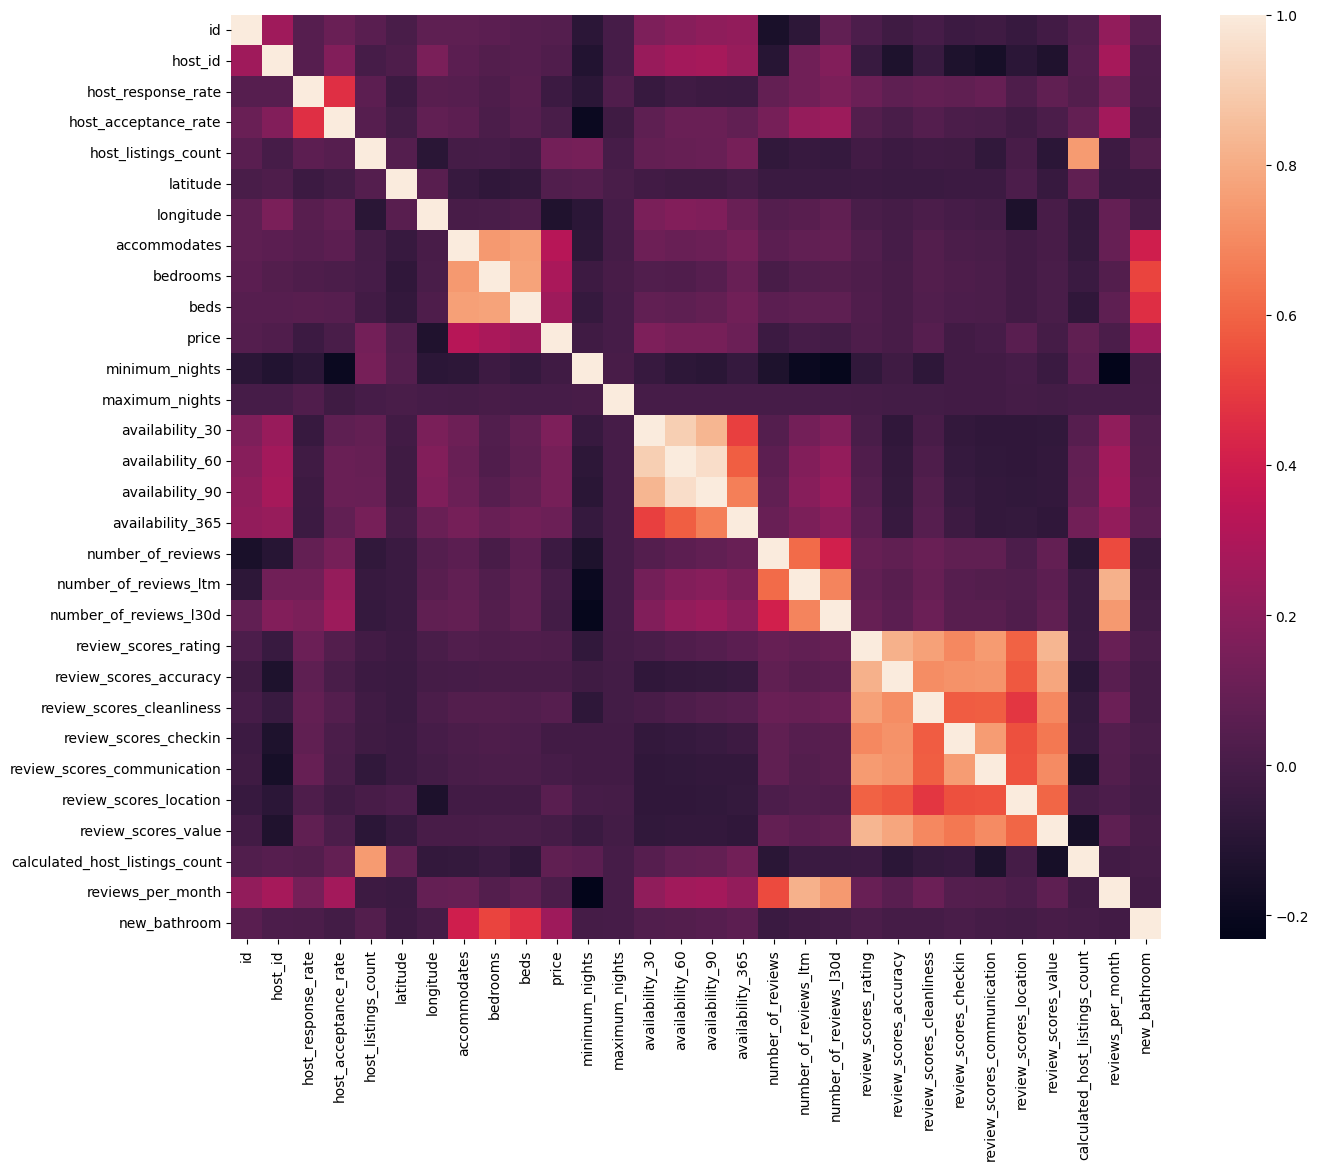

In [ ]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(abnb.corr(), ax=ax)
plt.show()

### Comment

Observations:
1. Out of all the individual scoring done by a traveler, the highest correlation to the overall score they gave the stay was of value of the listing. This is over accuracy, cleanliness, location, checkin process, and communication.
2. As we would expect, number of bedrooms/beds correlates highly with the number of people the listing can accomodate. This is not terribly helpful.
3. No single field correlates very highly with price.

In [ ]:
newabnb = abnb[['price', 'review_scores_rating']].copy() #create new dataframe with only 2 columns intended for scatter
newabnb.dropna(axis=0, inplace=True) #code will not run on null values. this will remove them
newabnb.shape #check resulting matrix dimensions

(29461, 2)

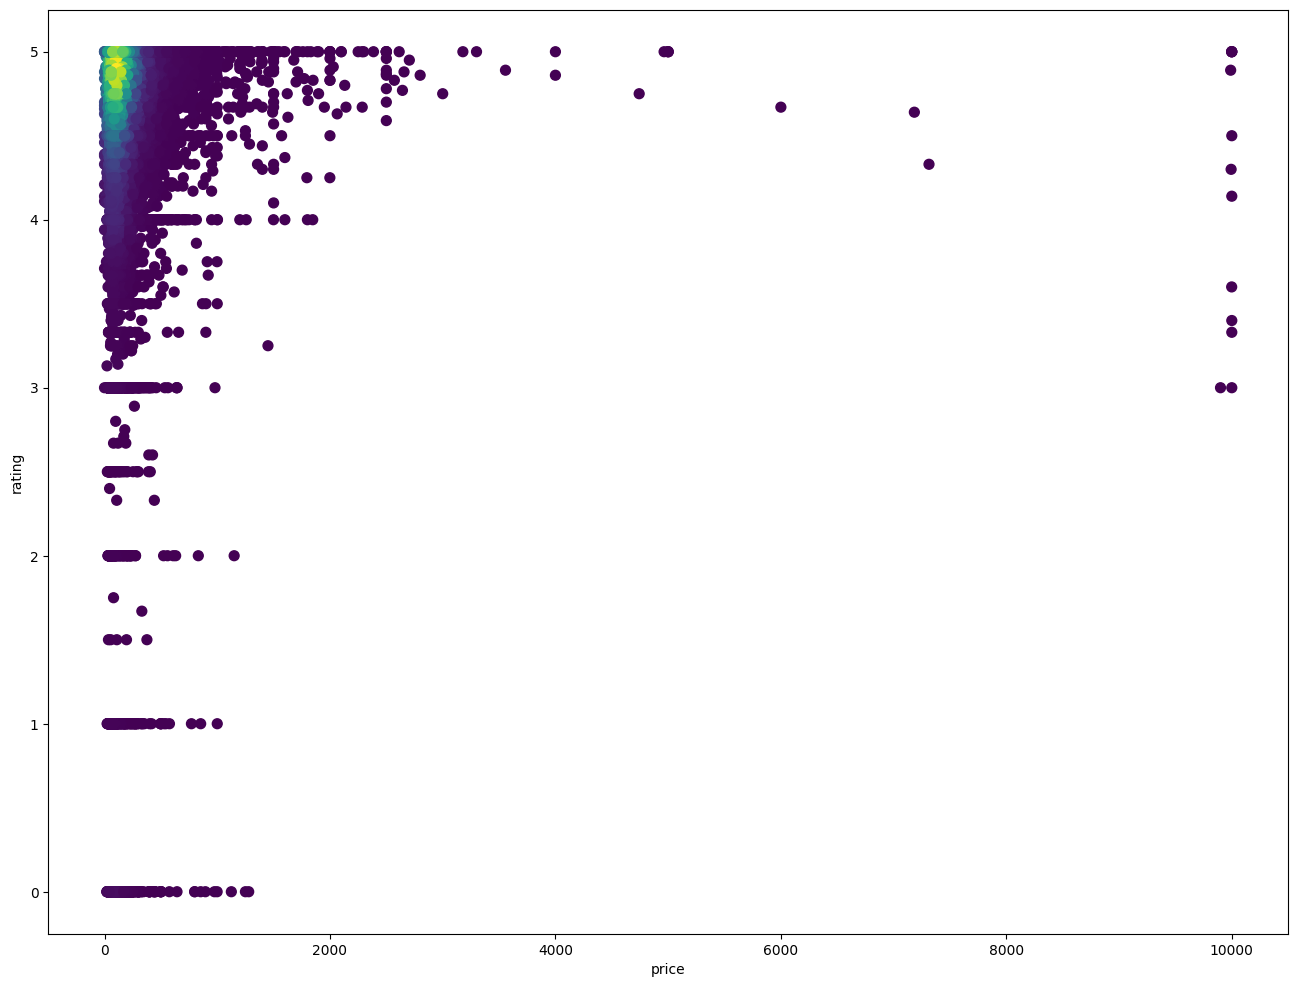

In [ ]:
xy = np.vstack([newabnb.price, newabnb.review_scores_rating])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(newabnb.price, newabnb.review_scores_rating, c=z, s=50)
ax.set_xlabel("price")
ax.set_ylabel("rating")
fig.set_size_inches(16, 12)
plt.show()

### Comment
1. The vast majority of listings are very highly rated and relatively low in price.
2. It is clear that there are many outliers in our dataset.

array([[<Axes: title={'center': 'price'}>]], dtype=object)

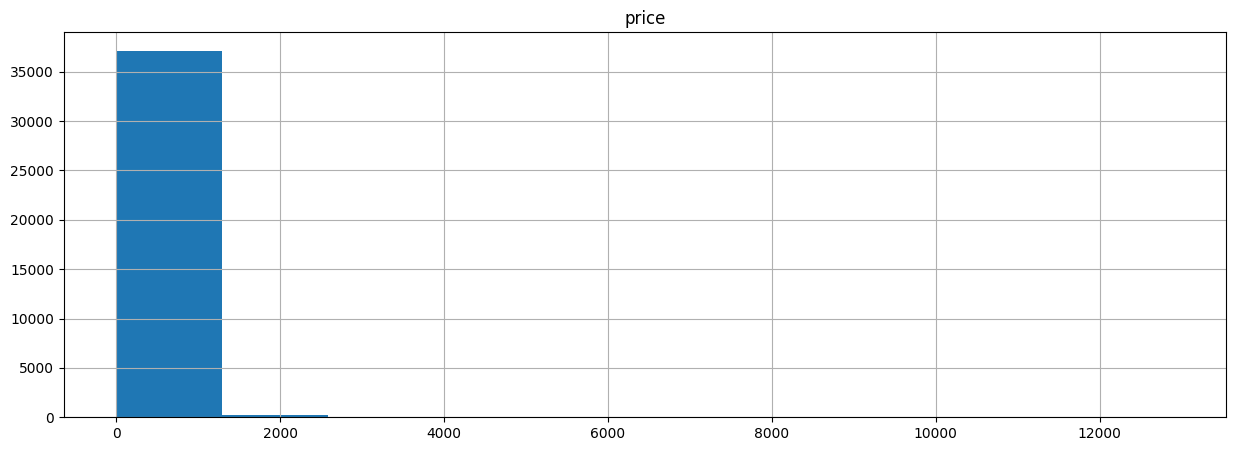

In [12]:
#What is the spread of the daily cost of an NYC Airbnb?
abnb.hist(column='price', bins = 10,
        figsize=(15, 5))

In [ ]:
#how many bnbs cost $0/how many bnbs have ratings of 0?? These would not be helpful datapoints to have in our model
print(len(abnb[abnb.price == 0]))
print(len(abnb[abnb.review_scores_rating == 0]))

32
472


In [ ]:
#review_scores_rating has considerable nans
abnb.review_scores_rating.isna().sum()

7949

# Amenities
This analysis is attemping to understand price and rating as it relates to all listings. It is desirable to address potential data quality issues in order to avoid skewed results. Using interquartile method was attempted as well as using data within 3 standard deviations of the mean. However, this excluded too much of the data.

In [ ]:
abnb2 = abnb[['id', 'amenities']].copy()

In [ ]:
abnb2.head()

,id,amenities
0,2595.0,"[""Essentials"", ""Bathtub"", ""Extra pillows and blankets"", ""Cooking basics"", ""Wifi"", ""Carbon monoxide alarm"", ""Heating"", ""Hair dryer"", ""Stove"", ""Oven"", ""Bed linens"", ""Cleaning before checkout"", ""Baking sheet"", ""Dishes and silverware"", ""Long term stays allowed"", ""Fire extinguisher"", ""Free street parking"", ""Keypad"", ""Hangers"", ""Refrigerator"", ""Hot water"", ""TV"", ""Smoke alarm"", ""Iron"", ""Coffee maker"", ""Air conditioning"", ""Kitchen"", ""Paid parking off premises"", ""Dedicated workspace"", ""Luggage dropoff allowed"", ""Ethernet connection""]"
1,5121.0,"[""Heating"", ""Long term stays allowed"", ""Kitchen"", ""Air conditioning"", ""Wifi""]"
2,5136.0,"[""Dryer"", ""Heating"", ""Hair dryer"", ""Carbon monoxide alarm"", ""Refrigerator"", ""Children\u2019s books and toys"", ""Smoke alarm"", ""Washer"", ""Long term stays allowed"", ""Private fenced garden or backyard"", ""HDTV with HBO Max, standard cable, Roku, Netflix"", ""Cable TV"", ""Air conditioning"", ""Kitchen"", ""Outdoor furniture"", ""Outdoor dining area"", ""BBQ grill"", ""Private patio or balcony"", ""Wifi""]"
3,5178.0,"[""Conditioner"", ""Essentials"", ""Extra pillows and blankets"", ""Wifi"", ""Shampoo"", ""Hair dryer"", ""Heating"", ""Bed linens"", ""Laundromat nearby"", ""Free street parking"", ""Drying rack for clothing"", ""Hangers"", ""Body soap"", ""Refrigerator"", ""Hot water"", ""TV"", ""Smoke alarm"", ""Iron"", ""Room-darkening shades"", ""Mini fridge"", ""Air conditioning"", ""Paid parking off premises"", ""Microwave"", ""Luggage dropoff allowed"", ""Lock on bedroom door""]"
4,5203.0,"[""Carbon monoxide alarm"", ""Heating"", ""Essentials"", ""Shampoo"", ""Hair dryer"", ""Hot water"", ""Breakfast"", ""Smoke alarm"", ""Elevator"", ""Host greets you"", ""Fire extinguisher"", ""Air conditioning"", ""Paid parking off premises"", ""Free street parking"", ""Wifi""]"


In [ ]:
abnb2['amenities'] = abnb2['amenities'].apply(literal_eval) #convert to list type
abnb2 = abnb2['amenities'].explode()
abnb2 = abnb2.to_frame()

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
len(abnb2.amenities.unique())

31274

In [ ]:
abnb2.amenities.unique()

array(['Essentials', 'Bathtub', 'Extra pillows and blankets',
       'Cooking basics', 'Wifi', 'Carbon monoxide alarm', 'Heating',
       'Hair dryer', 'Stove', 'Oven', 'Bed linens',
       'Cleaning before checkout', 'Baking sheet',
       'Dishes and silverware', 'Long term stays allowed',
       'Fire extinguisher', 'Free street parking', 'Keypad', 'Hangers',
       'Refrigerator', 'Hot water', 'TV', 'Smoke alarm', 'Iron',
       'Coffee maker', 'Air conditioning', 'Kitchen',
       'Paid parking off premises', 'Dedicated workspace',
       'Luggage dropoff allowed', 'Ethernet connection', 'Dryer',
       'Children’s books and toys', 'Washer',
       'Private fenced garden or backyard',
       'HDTV with HBO Max, standard cable, Roku, Netflix', 'Cable TV',
       'Outdoor furniture', 'Outdoor dining area', 'BBQ grill',
       'Private patio or balcony', 'Conditioner', 'Shampoo',
       'Laundromat nearby', 'Drying rack for clothing', 'Body soap',
       'Room-darkening shades', 'Min

There are 5,082 different amentity entries. Let's pick the most common ones

In [ ]:
abnb2.value_counts("accommodates").head(50)

KeyError: ignored

# Clean

In [14]:
model_linrle = abnb.copy() #linear regression label encode

In [ ]:
print(model.isna().any())
print("number of price=0 rows =",len(abnb[abnb.price == 0]))

id                              False
neighbourhood_cleansed          False
neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
property_type                   False
room_type                       False
accommodates                    False
bedrooms                         True
beds                             True
price                           False
review_scores_rating             True
review_scores_accuracy           True
review_scores_cleanliness        True
review_scores_checkin            True
review_scores_communication      True
review_scores_location           True
review_scores_value              True
new_bathroom                     True
new_bathroom_type                True
dtype: bool
number of price=0 rows = 32


In [ ]:
#delete rows where price=0
model = model[model.price != 0].copy()
print(model.shape)

(37378, 20)


In [ ]:
model.columns

Index(['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'new_bathroom',
       'new_bathroom_type'],
      dtype='object')

In [ ]:
model.dtypes

id                              float64
neighbourhood_cleansed           string
neighbourhood_group_cleansed     string
latitude                        float64
longitude                       float64
property_type                    string
room_type                        string
accommodates                    float64
bedrooms                        float64
beds                            float64
price                           float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
new_bathroom                    float64
new_bathroom_type                string
dtype: object

### Label encoding - bad result

In [ ]:
 #lets label encode all string columns
label_encoder = preprocessing.LabelEncoder()
model.neighbourhood_cleansed= label_encoder.fit_transform(model.neighbourhood_cleansed).copy()
model.neighbourhood_group_cleansed = label_encoder.fit_transform(model.neighbourhood_group_cleansed).copy()
model.property_type = label_encoder.fit_transform(model.property_type).copy()
model.room_type = label_encoder.fit_transform(model.room_type).copy()
model.new_bathroom_type = label_encoder.fit_transform(model.new_bathroom_type).copy()

In [ ]:
model['neighbourhood_cleansed'].unique()

array([142,  12, 211, 223, 145, 203, 236,  66,  90, 108, 107,  81,  69,
       131, 118, 104, 133,  37, 222, 177,  45, 228, 125,  33, 231, 167,
        65,  19, 210, 207, 218, 186, 149,  97,  59, 140,  82, 238,  39,
       105,  43,  70,  56, 160,   4,  30, 124, 188,  88, 152, 221, 101,
         0,  68,  36, 179, 209, 196,  76,  16, 197, 184,  98,   2,  80,
       212, 183, 121, 242, 103, 129, 199,  74,  10, 224, 138, 205,  22,
        23, 117, 132, 116,   6, 219,  91,  89,  47, 158,  73,  27,  85,
       215, 216, 159,  58,  49,  57, 137,  64,  50,  25,  62, 139, 122,
        48, 226,  40,   7,  96,  51, 182,  32, 174,  83,   3, 180, 235,
       200, 227, 239, 168,  26, 195, 165, 189,   8,  42, 234,  87, 162,
        44, 178,  52,  20,  79, 112,  77, 114, 151, 153,  28, 192,  86,
        41, 190, 128, 220, 143, 181, 202, 123, 119,  14,  93, 147, 113,
        67,  54, 204, 217, 172, 229, 134, 135,  60,  15,  35, 127, 115,
       102, 169, 198, 187, 148, 106, 111, 146, 206,  72, 155,  3

### One-Hot Encoding

In [ ]:
categorical_cols = ['neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'property_type', 'room_type', 'new_bathroom_type']

In [ ]:
modelo= pd.get_dummies(data = model, columns = categorical_cols)

In [ ]:
modelo.shape

(37378, 348)

In [ ]:
print(len(abnb.neighbourhood_cleansed.unique()),len(abnb.neighbourhood_group_cleansed.unique()),len(abnb.property_type.unique()),len(abnb.room_type.unique()),len(abnb.new_bathroom_type.unique()))
print("sum=",len(abnb.neighbourhood_cleansed.unique())+len(abnb.neighbourhood_group_cleansed.unique())+len(abnb.property_type.unique())+len(abnb.room_type.unique())+len(abnb.new_bathroom_type.unique()))

243 5 79 4 3
sum= 334


In [ ]:
modelo

,id,latitude,longitude,accommodates,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,new_bathroom,neighbourhood_cleansed_0,neighbourhood_cleansed_1,neighbourhood_cleansed_2,neighbourhood_cleansed_3,neighbourhood_cleansed_4,neighbourhood_cleansed_5,neighbourhood_cleansed_6,neighbourhood_cleansed_7,neighbourhood_cleansed_8,neighbourhood_cleansed_9,neighbourhood_cleansed_10,neighbourhood_cleansed_11,neighbourhood_cleansed_12,neighbourhood_cleansed_13,neighbourhood_cleansed_14,neighbourhood_cleansed_15,neighbourhood_cleansed_16,neighbourhood_cleansed_17,neighbourhood_cleansed_18,neighbourhood_cleansed_19,neighbourhood_cleansed_20,neighbourhood_cleansed_21,neighbourhood_cleansed_22,neighbourhood_cleansed_23,neighbourhood_cleansed_24,neighbourhood_cleansed_25,neighbourhood_cleansed_26,neighbourhood_cleansed_27,neighbourhood_cleansed_28,neighbourhood_cleansed_29,neighbourhood_cleansed_30,neighbourhood_cleansed_31,neighbourhood_cleansed_32,neighbourhood_cleansed_33,neighbourhood_cleansed_34,neighbourhood_cleansed_35,neighbourhood_cleansed_36,neighbourhood_cleansed_37,neighbourhood_cleansed_38,neighbourhood_cleansed_39,neighbourhood_cleansed_40,neighbourhood_cleansed_41,neighbourhood_cleansed_42,neighbourhood_cleansed_43,neighbourhood_cleansed_44,neighbourhood_cleansed_45,neighbourhood_cleansed_46,neighbourhood_cleansed_47,neighbourhood_cleansed_48,neighbourhood_cleansed_49,neighbourhood_cleansed_50,neighbourhood_cleansed_51,neighbourhood_cleansed_52,neighbourhood_cleansed_53,neighbourhood_cleansed_54,neighbourhood_cleansed_55,neighbourhood_cleansed_56,neighbourhood_cleansed_57,neighbourhood_cleansed_58,neighbourhood_cleansed_59,neighbourhood_cleansed_60,neighbourhood_cleansed_61,neighbourhood_cleansed_62,neighbourhood_cleansed_63,neighbourhood_cleansed_64,neighbourhood_cleansed_65,neighbourhood_cleansed_66,neighbourhood_cleansed_67,neighbourhood_cleansed_68,neighbourhood_cleansed_69,neighbourhood_cleansed_70,neighbourhood_cleansed_71,neighbourhood_cleansed_72,neighbourhood_cleansed_73,neighbourhood_cleansed_74,neighbourhood_cleansed_75,neighbourhood_cleansed_76,neighbourhood_cleansed_77,neighbourhood_cleansed_78,neighbourhood_cleansed_79,neighbourhood_cleansed_80,neighbourhood_cleansed_81,neighbourhood_cleansed_82,neighbourhood_cleansed_83,neighbourhood_cleansed_84,neighbourhood_cleansed_85,neighbourhood_cleansed_86,neighbourhood_cleansed_87,neighbourhood_cleansed_88,neighbourhood_cleansed_89,neighbourhood_cleansed_90,neighbourhood_cleansed_91,neighbourhood_cleansed_92,neighbourhood_cleansed_93,neighbourhood_cleansed_94,neighbourhood_cleansed_95,neighbourhood_cleansed_96,neighbourhood_cleansed_97,neighbourhood_cleansed_98,neighbourhood_cleansed_99,neighbourhood_cleansed_100,neighbourhood_cleansed_101,neighbourhood_cleansed_102,neighbourhood_cleansed_103,neighbourhood_cleansed_104,neighbourhood_cleansed_105,neighbourhood_cleansed_106,neighbourhood_cleansed_107,neighbourhood_cleansed_108,neighbourhood_cleansed_109,neighbourhood_cleansed_110,neighbourhood_cleansed_111,neighbourhood_cleansed_112,neighbourhood_cleansed_113,neighbourhood_cleansed_114,neighbourhood_cleansed_115,neighbourhood_cleansed_116,neighbourhood_cleansed_117,neighbourhood_cleansed_118,neighbourhood_cleansed_119,neighbourhood_cleansed_120,neighbourhood_cleansed_121,neighbourhood_cleansed_122,neighbourhood_cleansed_123,neighbourhood_cleansed_124,neighbourhood_cleansed_125,neighbourhood_cleansed_126,neighbourhood_cleansed_127,neighbourhood_cleansed_128,neighbourhood_cleansed_129,neighbourhood_cleansed_130,neighbourhood_cleansed_131,neighbourhood_cleansed_132,neighbourhood_cleansed_133,neighbourhood_cleansed_134,neighbourhood_cleansed_135,neighbourhood_cleansed_136,neighbourhood_cleansed_137,neighbourhood_cleansed_138,neighbourhood_cleansed_139,neighbourhood_cleansed_140,neighbourhood_cleansed_141,neighbourhood_cleansed_142,neighbourhood_cle

In [ ]:
model.columns

Index(['id', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bedrooms', 'beds', 'price', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'new_bathroom',
       'new_bathroom_type'],
      dtype='object')

# Linear Regression

In [ ]:
#remove longitude and latitude
#review scores - too correlated

In [ ]:
X = modelo.drop(['id','latitude','longitude','price'],axis=1)
y=modelo['price']

In [ ]:
X.head()

,accommodates,bedrooms,beds,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,new_bathroom,neighbourhood_cleansed_0,neighbourhood_cleansed_1,neighbourhood_cleansed_2,neighbourhood_cleansed_3,neighbourhood_cleansed_4,neighbourhood_cleansed_5,neighbourhood_cleansed_6,neighbourhood_cleansed_7,neighbourhood_cleansed_8,neighbourhood_cleansed_9,neighbourhood_cleansed_10,neighbourhood_cleansed_11,neighbourhood_cleansed_12,neighbourhood_cleansed_13,neighbourhood_cleansed_14,neighbourhood_cleansed_15,neighbourhood_cleansed_16,neighbourhood_cleansed_17,neighbourhood_cleansed_18,neighbourhood_cleansed_19,neighbourhood_cleansed_20,neighbourhood_cleansed_21,neighbourhood_cleansed_22,neighbourhood_cleansed_23,neighbourhood_cleansed_24,neighbourhood_cleansed_25,neighbourhood_cleansed_26,neighbourhood_cleansed_27,neighbourhood_cleansed_28,neighbourhood_cleansed_29,neighbourhood_cleansed_30,neighbourhood_cleansed_31,neighbourhood_cleansed_32,neighbourhood_cleansed_33,neighbourhood_cleansed_34,neighbourhood_cleansed_35,neighbourhood_cleansed_36,neighbourhood_cleansed_37,neighbourhood_cleansed_38,neighbourhood_cleansed_39,neighbourhood_cleansed_40,neighbourhood_cleansed_41,neighbourhood_cleansed_42,neighbourhood_cleansed_43,neighbourhood_cleansed_44,neighbourhood_cleansed_45,neighbourhood_cleansed_46,neighbourhood_cleansed_47,neighbourhood_cleansed_48,neighbourhood_cleansed_49,neighbourhood_cleansed_50,neighbourhood_cleansed_51,neighbourhood_cleansed_52,neighbourhood_cleansed_53,neighbourhood_cleansed_54,neighbourhood_cleansed_55,neighbourhood_cleansed_56,neighbourhood_cleansed_57,neighbourhood_cleansed_58,neighbourhood_cleansed_59,neighbourhood_cleansed_60,neighbourhood_cleansed_61,neighbourhood_cleansed_62,neighbourhood_cleansed_63,neighbourhood_cleansed_64,neighbourhood_cleansed_65,neighbourhood_cleansed_66,neighbourhood_cleansed_67,neighbourhood_cleansed_68,neighbourhood_cleansed_69,neighbourhood_cleansed_70,neighbourhood_cleansed_71,neighbourhood_cleansed_72,neighbourhood_cleansed_73,neighbourhood_cleansed_74,neighbourhood_cleansed_75,neighbourhood_cleansed_76,neighbourhood_cleansed_77,neighbourhood_cleansed_78,neighbourhood_cleansed_79,neighbourhood_cleansed_80,neighbourhood_cleansed_81,neighbourhood_cleansed_82,neighbourhood_cleansed_83,neighbourhood_cleansed_84,neighbourhood_cleansed_85,neighbourhood_cleansed_86,neighbourhood_cleansed_87,neighbourhood_cleansed_88,neighbourhood_cleansed_89,neighbourhood_cleansed_90,neighbourhood_cleansed_91,neighbourhood_cleansed_92,neighbourhood_cleansed_93,neighbourhood_cleansed_94,neighbourhood_cleansed_95,neighbourhood_cleansed_96,neighbourhood_cleansed_97,neighbourhood_cleansed_98,neighbourhood_cleansed_99,neighbourhood_cleansed_100,neighbourhood_cleansed_101,neighbourhood_cleansed_102,neighbourhood_cleansed_103,neighbourhood_cleansed_104,neighbourhood_cleansed_105,neighbourhood_cleansed_106,neighbourhood_cleansed_107,neighbourhood_cleansed_108,neighbourhood_cleansed_109,neighbourhood_cleansed_110,neighbourhood_cleansed_111,neighbourhood_cleansed_112,neighbourhood_cleansed_113,neighbourhood_cleansed_114,neighbourhood_cleansed_115,neighbourhood_cleansed_116,neighbourhood_cleansed_117,neighbourhood_cleansed_118,neighbourhood_cleansed_119,neighbourhood_cleansed_120,neighbourhood_cleansed_121,neighbourhood_cleansed_122,neighbourhood_cleansed_123,neighbourhood_cleansed_124,neighbourhood_cleansed_125,neighbourhood_cleansed_126,neighbourhood_cleansed_127,neighbourhood_cleansed_128,neighbourhood_cleansed_129,neighbourhood_cleansed_130,neighbourhood_cleansed_131,neighbourhood_cleansed_132,neighbourhood_cleansed_133,neighbourhood_cleansed_134,neighbourhood_cleansed_135,neighbourhood_cleansed_136,neighbourhood_cleansed_137,neighbourhood_cleansed_138,neighbourhood_cleansed_139,neighbourhood_cleansed_140,neighbourhood_cleansed_141,neighbourhood_cleansed_142,neighbourhood_cleansed_143,neighbourhood_clea

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=90)

In [ ]:
lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [ ]:
pd.set_option('display.max_rows', None)
coeff_df.sort_values('Coefficient', ascending=False)

,Coefficient
room_type_0,6.987098e+13
room_type_2,6.987098e+13
room_type_1,6.987098e+13
room_type_3,5.666889e+13
property_type_74,6.604586e+12
property_type_69,6.604586e+12
property_type_64,6.604586e+12
property_type_73,6.604586e+12
property_type_75,6.604586e+12
property_type_70,6.604586e+12


In [ ]:
predictions = lm.predict(X_test)

In [ ]:
ytest=y_test.values

In [ ]:
fig = px.scatter(x=ytest,y=predictions,width=1000, height=1000)
fig.update_layout(yaxis_range=[0,2000])
fig.update_layout(xaxis_range=[0,2000])
fig.show()

In [ ]:
print("min of y_test =",min(y_test),"max of y_test =", max(y_test))
print("min of predictions =",min(predictions),"max of predictions =", max(predictions))

min of y_test = 14.0 max of y_test = 12900.0
min of predictions = -6604586412529.0 max of predictions = 6597506688480.25


In [ ]:
len(X_test)/(len(X_train)+len(X_test))

0.40002140296431055

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3818505041.4207444
MSE: 2.347247993226225e+22
RMSE: 153207310309.47006


By not removing outliers of price, the results were the following:
MAE: 102.87464879261222
MSE: 98480.388982008
RMSE: 313.8158520247312
min of y_test = 10.0 max of y_test = 12900.0
min of predictions = -195.4210180237945 max of predictions = 2462.3377073622396


This result GOT WORSE by one-hot encoding the categorical columns:
MAE: 3818505041.4207444
MSE: 2.347247993226225e+22
RMSE: 153207310309.47006
min of y_test = 14.0 max of y_test = 12900.0
min of predictions = -6604586412529.0 max of predictions = 6597506688480.25


In [ ]:
abnb.groupby(['accommodates'])['price'].mean()

accommodates
0.0        0.000000
1.0       86.659480
2.0      150.680605
3.0      176.800162
4.0      247.843488
5.0      267.125230
6.0      327.848336
7.0      417.125654
8.0      453.170897
9.0      516.121951
10.0     562.294737
11.0     537.461538
12.0     817.830357
13.0     516.736842
14.0    1172.142857
15.0     739.960000
16.0    1254.183099
Name: price, dtype: float64

In [ ]:
abnb.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    243.989002
Hotel room         358.374359
Private room       119.108697
Shared room        119.422780
Name: price, dtype: float64